#K-MEANS Implementation

#Importing independencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#create a datasets
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples = 1000, n_features = 2,centers = 3)

In [4]:
X

array([[-5.94738356, -0.86599385],
       [-6.61147833, -0.94674604],
       [-4.70161385, -3.51477027],
       ...,
       [-0.58464236,  7.91469985],
       [-5.2485213 ,  0.10017849],
       [-5.10051347, -5.72524447]])

In [5]:
y

array([0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0,
       1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2,
       0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1,
       2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2,
       0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 0,
       0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2,

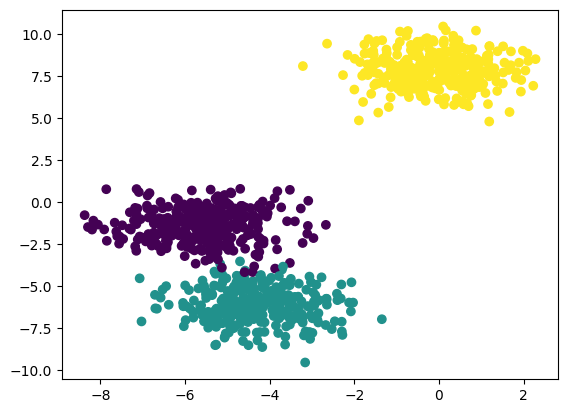

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

In [14]:
#Standardization (Feature Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)


In [19]:
from sklearn.cluster import KMeans


In [24]:
#Elbow method..! to select to K values
wcss= []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(scaled_x_train)
  wcss.append(kmeans.inertia_)


#Here our k values get 1 to 10 and use initializie k-means.
#KMeans() initializes the K-Means clustering model with:
#n_clusters=k → Number of clusters set to k.
#init='k-means++' → Smart centroid initialization:
#Prevents poor clustering by choosing initial cluster centers wisely.
#Reduces convergence time.
#and it will get in inertia_ feature.


In [25]:
wcss

[1339.9999999999982,
 210.0625500113711,
 112.84830654074152,
 94.41231906634249,
 72.43279113114654,
 68.52994482818762,
 46.481618685796526,
 41.24247302953491,
 38.30828217672227,
 32.94807673909923]

#Here see our K-Values increases our WCSS(With cluster sum of squares) keep on decreases.

#How we will choose our K value

Text(0, 0.5, 'WCSS')

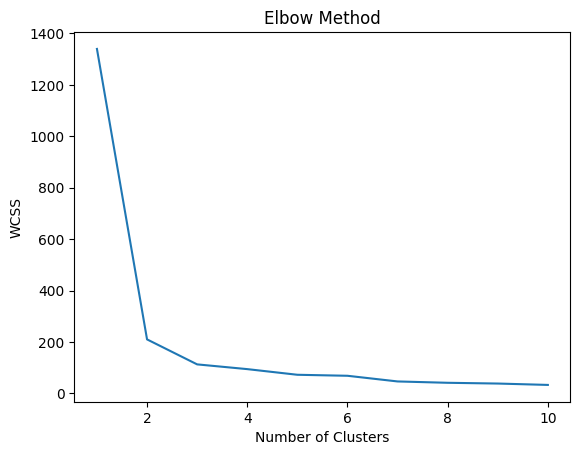

In [26]:
#plot Elbow method
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

#If you see here after 2 value remain line goes stagnate so we can choose k=3 is our k-value

In [53]:
kmeans  = KMeans(n_clusters=2,init="k-means++")
kmeans.fit(scaled_x_train)

KMeans(n_clusters=2)

In [54]:
kmeans.predict(scaled_x_train)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,

In [55]:
y_pred  =kmeans.predict(scaled_x_test)

In [56]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

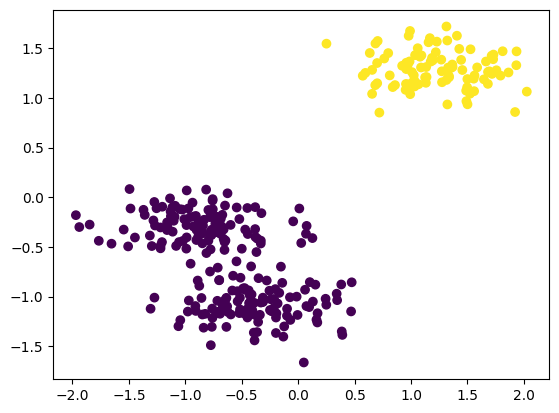

In [57]:
plt.scatter(scaled_x_test[:,0],scaled_x_test[:,1],c=y_pred)

In [ ]:
#We need to Validate K Value
#KneeLocator
#Silhoutee Scoring

In [39]:
!pip install kneed

In [41]:
from kneed import KneeLocator

In [43]:
kl = KneeLocator(range(1,11),wcss,curve="convex",direction = "decreasing")

In [58]:
kl.elbow

2

In [59]:
#Silhouteee Scoring

from sklearn.metrics import silhouette_score

In [60]:
silhouette_coefficents =[]
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(scaled_x_train)
  score  = silhouette_score(scaled_x_train,kmeans.labels_)
  silhouette_coefficents.append(score)

In [61]:
silhouette_coefficents

[0.7528502062704843,
 0.6163889293621434,
 0.492081631150557,
 0.5501875847395815,
 0.4312391338670977,
 0.39694111180950353,
 0.4046729168433108,
 0.37640067165919255,
 0.36091333677771165]

Text(0, 0.5, 'Silhoutee Score')

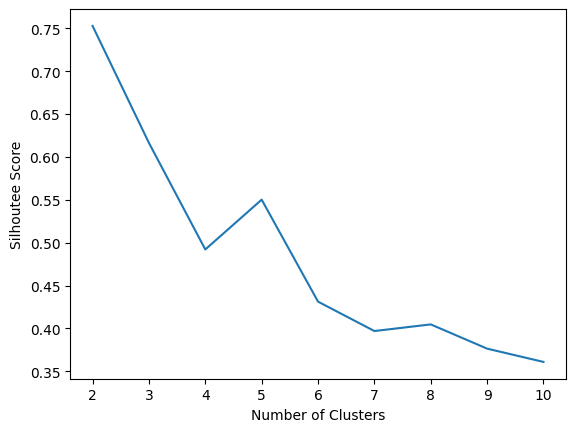

In [62]:
plt.plot(range(2,11),silhouette_coefficents)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutee Score")

#When ever K=2 my value is 0.75 and when it is 4 it 0.50
#where is the value is higher i can use that k=2